In [1]:
import tensorflow as tf
from scipy.io import loadmat
import matplotlib.pyplot as plt
import random
import os
import numpy as np
import imageio
import random
import pickle

from tensorflow.keras import layers, Model, Input, Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten

tf.keras.backend.set_floatx('float64')
large_mnist = "../Lab 1/notMNIST_large"
small_mnist = "../Lab 1/notMNIST_small"

# Load data

Train data size: 194419. Val data size: 10000. Test data size: 19000


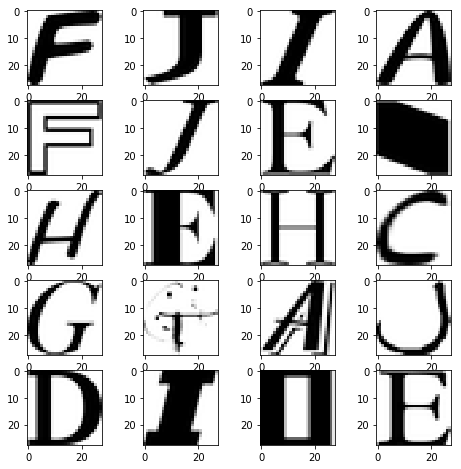

In [2]:
def load_data():
    return load_from_pickle("_train.pickle"), load_from_pickle("_val.pickle"), load_from_pickle("_test.pickle")

def load_from_pickle(pickle_name):
    with open(large_mnist + pickle_name, 'rb') as f:
        return pickle.load(f)
    
train_data, val_data, test_data = load_data()
print("Train data size: %d. Val data size: %d. Test data size: %d" % (len(train_data), len(val_data), len(test_data)))

fig = plt.figure(figsize=(8, 8))
columns, rows = 4, 5
for i in range(1, columns * rows + 1):
    img = random.choice(train_data)[0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img.reshape(28, 28), interpolation='nearest', cmap='Greys')
plt.show()

In [3]:
def unzip(tuples):
    first = [t[0] for t in tuples]
    second = [t[1] for t in tuples]
    return np.array(first), np.array(second)

train_x, train_y = unzip(train_data)
val_x, val_y = unzip(val_data)
test_x, test_y = unzip(test_data)

train_x = train_x.reshape((len(train_x), 28, 28, 1))
val_x = val_x.reshape((len(val_x), 28, 28, 1))
test_x = test_x.reshape((len(test_x), 28, 28, 1))

In [17]:
num_classes = 10
model = Sequential([
    Conv2D(32, (4, 4), input_shape=(28, 28, 1,)),
    Conv2D(64, (2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(num_classes, activation="softmax")
])
    
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        8256      
_________________________________________________________________
flatten_4 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               4718720   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 4,728,810
Trainable params: 4,728,810
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(train_x, train_y, epochs=8, batch_size=32, validation_data=(val_x, val_y))

Train on 194419 samples, validate on 10000 samples
Epoch 1/3
194419/194419 [==============================] - 281s 1ms/sample - loss: 0.2905 - accuracy: 0.9117 - val_loss: 0.4289 - val_accuracy: 0.8806
Epoch 2/3
194419/194419 [==============================] - 253s 1ms/sample - loss: 0.2723 - accuracy: 0.9172 - val_loss: 0.4589 - val_accuracy: 0.8839
Epoch 3/3
194419/194419 [==============================] - 254s 1ms/sample - loss: 0.2574 - accuracy: 0.9210 - val_loss: 0.5442 - val_accuracy: 0.8791


In [8]:
def plot_history(training_history):
    plt.plot(training_history.history['accuracy'])
    plt.plot(training_history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

19000/19000 [==============================] - 7s 348us/sample - loss: 0.5605 - accuracy: 0.8787
[0.5604870057387776, 0.8787368421052631]


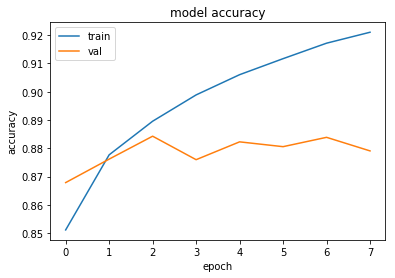

In [25]:
first_score = model.evaluate(test_x, test_y)
print(first_score)
plot_history(history)

## Add pooling

In [22]:
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
num_classes = 10

model = Sequential([
    Conv2D(64, (4, 4), input_shape=(28, 28, 1,)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(num_classes, activation="softmax")
])
    
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 2,363,210
Trainable params: 2,363,210
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(train_x, train_y, epochs=5, batch_size=32, validation_data=(val_x, val_y))

Train on 194419 samples, validate on 10000 samples
Epoch 1/5
194419/194419 [==============================] - 125s 643us/sample - loss: 0.4264 - accuracy: 0.8741 - val_loss: 0.3369 - val_accuracy: 0.9013
Epoch 2/5
194419/194419 [==============================] - 125s 641us/sample - loss: 0.3178 - accuracy: 0.9043 - val_loss: 0.3407 - val_accuracy: 0.9001
Epoch 3/5
194419/194419 [==============================] - 125s 640us/sample - loss: 0.2682 - accuracy: 0.9184 - val_loss: 0.3342 - val_accuracy: 0.9052
Epoch 4/5
194419/194419 [==============================] - 125s 641us/sample - loss: 0.2306 - accuracy: 0.9285 - val_loss: 0.3536 - val_accuracy: 0.8939
Epoch 5/5
194419/194419 [==============================] - 125s 643us/sample - loss: 0.1978 - accuracy: 0.9384 - val_loss: 0.4031 - val_accuracy: 0.9065


19000/19000 [==============================] - 4s 192us/sample - loss: 0.4110 - accuracy: 0.9053
[0.4110374646130862, 0.9053157894736842]


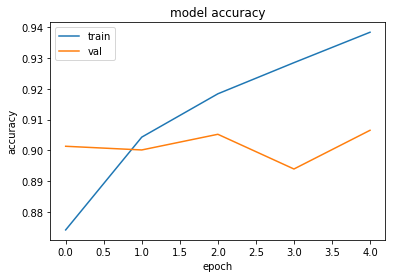

In [25]:
second_score = model.evaluate(test_x, test_y)
print(second_score)
plot_history(history)

# LeNet-5 Model

In [5]:
from tensorflow.keras.layers import AveragePooling2D
num_classes = 10

model = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1), padding="same"),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    Flatten(),
    Dense(120, activation="relu"),
    Dropout(0.1),
    Dense(84, activation="relu"),
    Dropout(0.1),
    Dense(num_classes, activation="softmax")
])


model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               48120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)               0

In [11]:
history = model.fit(train_x, train_y, epochs=15, batch_size=32, validation_data=(val_x, val_y))

Train on 194419 samples, validate on 10000 samples
Epoch 1/5
194419/194419 [==============================] - 66s 340us/sample - loss: 0.2680 - accuracy: 0.9139 - val_loss: 0.2837 - val_accuracy: 0.9143
Epoch 2/5
194419/194419 [==============================] - 66s 341us/sample - loss: 0.2636 - accuracy: 0.9155 - val_loss: 0.2700 - val_accuracy: 0.9167
Epoch 3/5
194419/194419 [==============================] - 103s 529us/sample - loss: 0.2586 - accuracy: 0.9169 - val_loss: 0.2740 - val_accuracy: 0.9158
Epoch 4/5
194419/194419 [==============================] - 267s 1ms/sample - loss: 0.2545 - accuracy: 0.9180 - val_loss: 0.2740 - val_accuracy: 0.9156
Epoch 5/5
194419/194419 [==============================] - 267s 1ms/sample - loss: 0.2519 - accuracy: 0.9190 - val_loss: 0.2763 - val_accuracy: 0.9138


In [24]:
third_score = model.evaluate(test_x, test_y)

[0.28846720058353015, 0.9132105263157895]

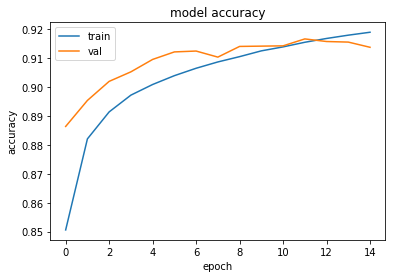

In [14]:
plot_history(history)

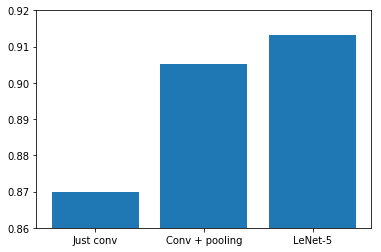

In [27]:
plt.bar(["Just conv", "Conv + pooling", "LeNet-5"], [0.87, second_score[1], third_score[1]])
plt.ylim((0.86, 0.92))
plt.show()